In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv')

In [6]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [9]:
dataList=list(data['Weighted_Price'])
shortDataList=dataList[-100000:]

In [37]:
cash=10000
heldCoins=0
percentage=10
buyTimes=0
sellTimes=0

In [32]:
def buySome(price):
    global cash
    global heldCoins
    global percentage
    amount=cash/percentage
    numCoins=amount/price
    cash-=amount
    heldCoins+=numCoins

In [33]:
def sellSome(price):
    global cash
    global heldCoins
    global percentage
    sellCoins=heldCoins/percentage
    newDollars=sellCoins*price
    heldCoins-=sellCoins
    cash+=newDollars

In [41]:
for i in range(len(dataList)):
    if dataList[i-2]:
        # print(shortDataList[i])
        if (dataList[i]-dataList[i-1])>0: # first derivative is positive
            if (dataList[i]-dataList[i-1])> (dataList[i-1]-dataList[i-2]): # second derivative is positive
                buySome(dataList[i])
                buyTimes+=1
                # print("Buy")
        elif(dataList[i]-dataList[i-1])>0: # first derivative is negative
            if (dataList[i]-dataList[i-1]) < (dataList[i-1]-dataList[i-2]): # second derivative is negative
                sellSome(dataList[i])
                sellTimes+=1
                # print("Sell")

In [42]:
print(cash, heldCoins)

2.5e-323 2.83056161341


In [43]:
print(buyTimes, sellTimes)

759989 0


In [45]:
plt.plot(range(len(dataList)), dataList)

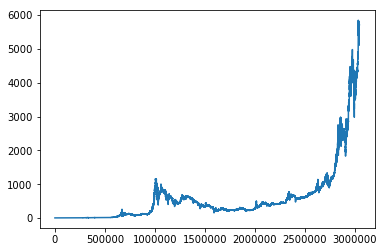

In [46]:
plt.show()